In [1]:
# Load EDA pkgs
import numpy as np
import pandas as pd

# Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load ML tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('../data/df_fake_real_news.csv')

In [3]:
df = df[df['text'].notnull()]
df = df.dropna()
df.reset_index(inplace=True)
#df = df.drop(axis=1, columns='level_0')
df.head(5)

,index,title,text,subject,date,category,length_text,length_title
0,0,donald trump send embarrass new year eve messa...,donald trump wish american happi new year leav...,News,736694,0,255,9
1,1,drunk brag trump staffer start russian collus ...,hous intellig committe chairman devin nune go ...,News,736694,0,178,8
2,2,sheriff david clark becom internet joke threat...,friday reveal former milwauke sheriff david cl...,News,736693,0,315,10
3,3,trump obsess even obama name code websit imag,christma day donald trump announc back work fo...,News,736692,0,238,8
4,4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,736688,0,208,7


In [4]:
df = df.drop(axis=1, columns='index')
df

,title,text,subject,date,category,length_text,length_title
0,donald trump send embarrass new year eve messa...,donald trump wish american happi new year leav...,News,736694,0,255,9
1,drunk brag trump staffer start russian collus ...,hous intellig committe chairman devin nune go ...,News,736694,0,178,8
2,sheriff david clark becom internet joke threat...,friday reveal former milwauke sheriff david cl...,News,736693,0,315,10
3,trump obsess even obama name code websit imag,christma day donald trump announc back work fo...,News,736692,0,238,8
4,pope franci call donald trump christma speech,pope franci use annual christma day messag reb...,News,736688,0,208,7
...,...,...,...,...,...,...,...
38208,north korea shipment syria chemic arm agenc in...,unit nation two north korean shipment syrian...,worldnews,736562,1,275,10
38209,lexisnexi withdrew two product chines market,london lexisnexi provid legal regulatori bus...,worldnews,736563,1,73,6
38210,minsk cultur hub becom author,minsk shadow disus sovietera factori minsk s...,worldnews,736563,1,169,5
38211,vatican upbeat possibl pope franci visit russia,moscow vatican secretari state cardin pietro...,worldnews,736563,1,116,7


comparando el largo de los textos en fake_news con real_news

#### Splitting the dataframe

In [5]:
Y = df["category"]

#### Making train and test data

In [6]:
# Splitting the data into 70 percent train and 30 percent test
X_train, X_test, Y_train, Y_test = train_test_split(df["text"], Y, test_size=0.30, random_state=40)

### <span style="color:#306998">Tfidf vectorizer</span>
<span style="color:#356F9F"> TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.  </span> 

In [7]:
# Applying tfidf
tfidf_vect = TfidfVectorizer(max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [8]:
print(tfidf_test)

  (0, 139489)	0.09440276492498716
  (0, 137465)	0.4666774503312652
  (0, 137411)	0.044153997573981585
  (0, 137054)	0.11491086883898484
  (0, 136560)	0.027241952739011605
  (0, 135025)	0.063817802009009
  (0, 132787)	0.02904968984613222
  (0, 132614)	0.04507329071832335
  (0, 130341)	0.06442918378849413
  (0, 127579)	0.2350517584795784
  (0, 127123)	0.023921686419460922
  (0, 126461)	0.1453963828932853
  (0, 125859)	0.019151032963257344
  (0, 125743)	0.11265492997493583
  (0, 124900)	0.018784440899302934
  (0, 124767)	0.03321637244130531
  (0, 123510)	0.04830639109646747
  (0, 121308)	0.05011547163818694
  (0, 119555)	0.0313550435046979
  (0, 118239)	0.07420983733941305
  (0, 117070)	0.028034931948916878
  (0, 114173)	0.06623567832493556
  (0, 112972)	0.04084195057597677
  (0, 111289)	0.03191572983161652
  (0, 110344)	0.023868697800604344
  :	:
  (11463, 80734)	0.07655586127226295
  (11463, 78065)	0.16964910910319334
  (11463, 75528)	0.07900507852049447
  (11463, 75106)	0.0839799411555

In [30]:
print(tfidf_vect.get_feature_names()[-20:])

['zvizdic', 'zvizic', 'zwak', 'zweig', 'zweli', 'zwillich', 'zwillig', 'zwolinski', 'zxmgklb', 'zych', 'zygot', 'zyklon', 'zynga', 'zypri', 'zyuganov', 'zyuseragentifzxzbreak', 'zzzzaaaacccchhh', 'zzzzzzzz', 'zzzzzzzzzzzzz', 'émigré']


In [10]:
count_vect = CountVectorizer()
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [11]:
print(count_test)

  (0, 543)	1
  (0, 872)	3
  (0, 1130)	2
  (0, 2323)	1
  (0, 5186)	1
  (0, 5827)	1
  (0, 6516)	1
  (0, 6804)	1
  (0, 8023)	2
  (0, 9277)	1
  (0, 9655)	1
  (0, 11528)	1
  (0, 17733)	1
  (0, 18050)	1
  (0, 19831)	1
  (0, 21502)	1
  (0, 22017)	1
  (0, 22116)	9
  (0, 22298)	2
  (0, 24237)	1
  (0, 24834)	3
  (0, 25029)	1
  (0, 25166)	1
  (0, 26702)	1
  (0, 26746)	1
  :	:
  (11463, 43590)	1
  (11463, 44515)	2
  (11463, 50649)	1
  (11463, 51519)	2
  (11463, 52757)	1
  (11463, 55986)	1
  (11463, 57037)	1
  (11463, 66697)	1
  (11463, 75106)	1
  (11463, 75528)	1
  (11463, 78065)	1
  (11463, 80734)	1
  (11463, 95896)	1
  (11463, 96674)	1
  (11463, 100242)	1
  (11463, 103158)	1
  (11463, 103861)	1
  (11463, 105646)	1
  (11463, 108855)	1
  (11463, 113774)	1
  (11463, 117133)	1
  (11463, 127124)	1
  (11463, 127130)	1
  (11463, 128329)	1
  (11463, 140928)	1


In [31]:
print(count_vect.get_feature_names()[0:20])

['aa', 'aaa', 'aaaahhhh', 'aaainnertextreplacernrngquotnquotelsevar', 'aab', 'aaba', 'aabo', 'aaccord', 'aachen', 'aadhaar', 'aadocumentmodevoid', 'aaf', 'aafunctionabforvar', 'aai', 'aaibfunctionabcifbbubampampybampampycampampkbforvar', 'aaja', 'aalberg', 'aalbert', 'aaldef', 'aalo']


## Machine learning

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [14]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.920
[[4438  775]
 [ 142 6109]]


In [15]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
917 / 11464
Percentage accuracy:  92.0010467550593


In [16]:
## Plotting confusion matrix for TF-Idf vectorizer

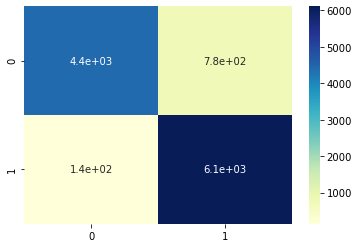

In [17]:
sns.heatmap(cm, cmap="YlGnBu", annot=True);

### Count Vectorized

In [18]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.948
[[4889  324]
 [ 275 5976]]


In [19]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
599 / 11464
Percentage accuracy:  94.77494766224703


In [20]:
## Plotting confusion matrix for Count vectorizer.

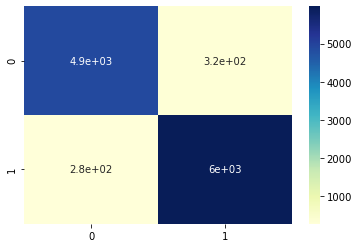

In [21]:
sns.heatmap(cm2, cmap="YlGnBu", annot=True);

## 2. Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized

In [23]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9576064200976971
--------------------------------------------------
confusion_matrix train is:  [[12180     0]
 [    0 14569]]
confusion_matrix test is:  [[4867  346]
 [ 140 6111]]
Wrong predictions out of total
--------------------------------------------------
486 / 11464
--------------------------------------------------


### Count Vectorized

In [24]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9610083740404746
--------------------------------------------------
confusion_matrix train is:  [[12180     0]
 [    0 14569]]
confusion_matrix test is:  [[4870  343]
 [ 104 6147]]
Wrong predictions out of total
--------------------------------------------------
447 / 11464
--------------------------------------------------


## K-Nearest Neighbour

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is:  ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.8817899734569516
Model accuracy on test is:   0.8319958129797628
--------------------------------------------------


In [27]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is:  ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[ 9381  2799]
 [  363 14206]]
confusion_matrix test is:   [[3548 1665]
 [ 261 5990]]
Wrong predictions out of total
--------------------------------------------------
1926 / 11464
--------------------------------------------------


In [28]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is:  ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.8066469774571012
Model accuracy on test is:   0.7527041172365666
--------------------------------------------------


In [29]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is:  ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[ 9049  3131]
 [ 2041 12528]]
confusion_matrix test is:   [[3548 1665]
 [1170 5081]]
Wrong predictions out of total
--------------------------------------------------
2835 / 11464
--------------------------------------------------
